In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

### Preprocesamiento de los datos

#### Consigna 1

Leer los datos del archivo `tabla_nutricional.csv`. Completar las celdas faltantes con ceros y asegurarse de que todos los datos estén en la misma unidad.


In [5]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

tabla_nutricional.fillna(0, inplace=True) #Reemplazamos los nulls por 0s

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000 #Convertimos todo a gramos
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000 
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

tabla_nutricional.head(57)

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,0.00,4.990,2.190,0.520,0.00,0.153900,0.28350,0.000189
1,Leche entera en polvo,11.00,4.510,2.840,2.730,0.00,1.620,0.770,0.060,0.00,0.044440,0.09900,0.000060
2,Yogurt,19.00,2.450,0.510,0.490,0.00,0.320,0.140,0.014,0.00,0.007990,0.01767,0.000005
3,Queso crema,1.66,0.060,0.100,0.370,0.00,0.360,0.110,0.010,0.00,0.001230,0.00093,0.000000
4,Queso cuartirolo,3.66,0.060,0.770,0.800,0.00,0.760,0.210,0.020,0.00,0.020840,0.01654,0.000000
5,Queso rallar,1.66,0.060,0.550,0.450,0.00,0.360,0.110,0.008,0.00,0.020420,0.01578,0.000000
6,Huevo,16.00,0.000,1.920,1.890,0.00,0.510,0.720,0.460,0.00,0.021600,0.00896,0.000400
7,Asado,50.00,0.000,9.300,7.500,0.00,2.930,3.270,0.189,0.00,0.033000,0.00750,0.001120
8,Paleta,15.00,0.000,3.000,1.500,0.00,0.880,0.980,0.056,0.00,0.009900,0.00180,0.000340
9,Hueso c/carne,15.00,0.000,3.000,1.500,0.00,0.880,0.980,0.056,0.00,0.009900,0.00180,0.000340


# Consigna 2

Desarrollar una función que reciba como parámetro un DataFrame y que evalúe si las cantidades de los principales elementos de la dieta (proteínas, carbohidratos, grasas, sodio, fibra, frutas y verduras) cumplen los márgenes de ingesta de la OMS. Esta función debe devolver VERDADERO si los cumple.


In [6]:
def eval_oms (a:pd.DataFrame):

    hidratosDeCarbono=a['HC (gr)'].sum()
    proteinas=a['Proteinas (gr)'].sum()
    grasas=a['Grasas (gr)'].sum()
    azucaresL=a['Azucares Libres (gr)'].sum()
    ags=a['AGS (gr)'].sum()
    agni=a['AGNI (gr)'].sum()
    agP=a['AG p (gr)'].sum()
    fibra=a['Fibra (gr)'].sum()
    sodio=a['Na (gr)'].sum()
    calcio=a['Ca (gr)'].sum()
    hierro=a['Fe (gr)'].sum()
    cantidad=(hidratosDeCarbono+proteinas+grasas+azucaresL+fibra+sodio+calcio+hierro)
    hidratosDeCarbonoP=(hidratosDeCarbono/cantidad)*100
    proteinasP=(proteinas/cantidad)*100
    grasasP=(grasas/cantidad)*100
    azucaresLP=(azucaresL/cantidad)*100
    agsP=(ags/cantidad)*100
    sodiomg=sodio*1000-2000 #Restamos los 2000 miligramos de la sal fina (Nos dijo un ayudante que lo hagamos)

    
    
    lista_fru_ver=['Acelga', 'Banana', 'Batata', 'Cebolla', 'Mandarina', 'Lechuga', 'Manzana', 'Naranja', 'Papa', 'Pera' , 'Tomate', 'Zanahoria', 'Zapallo' ]
    cantidadFV=a[a['Alimento'].isin(lista_fru_ver)]['Cantidad (gr/ml)'].sum()
    print ("Hidratos de carbono:",hidratosDeCarbonoP, " Proteinas:",proteinasP,  " Grasas:", grasasP , " Azucares Libres:",azucaresLP, " ags:", agsP," Fibra:", fibra," Sodio:", sodiomg," Frutas y Verduras:", cantidadFV)
    print ("Hidratos de carbono:" , 55< hidratosDeCarbonoP < 75 , " Proteinas:", 10 < proteinasP < 15, " Grasas:", 15 < grasasP < 30, " Azucares Libres:",azucaresLP <10, " ags:", agsP <10," Fibra:", fibra >25, " Sodio:", sodiomg < 2000, " Frutas y Verduras:", cantidadFV >= 400)

    return 55< hidratosDeCarbonoP < 75 and 10 < proteinasP < 15 and  15 < grasasP < 30 and azucaresLP <10 and agsP <10 and fibra >25 and sodiomg < 2000 and cantidadFV >= 400


eval_oms(tabla_nutricional)

Hidratos de carbono: 60.18272168796659  Proteinas: 16.491328855678784  Grasas: 11.28307752323229  Azucares Libres: 8.32539753017686  ags: 3.840978997975164  Fibra: 21.26  Sodio: 1337.714  Frutas y Verduras: 634.0
Hidratos de carbono: True  Proteinas: False  Grasas: False  Azucares Libres: True  ags: True  Fibra: False  Sodio: True  Frutas y Verduras: True


False

## Análisis en Componentes Principales

### Consigna 3

Realizar un Análisis en Componentes Principales (ACP), tomando el valor nutricional de cada alimento por gramo. Graficar cada alimento como un punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. En este gráfico, analizar los clusters que quedan planteados por la proyección.

In [8]:
def calculoACP_por_fila(df: pd.DataFrame):
    df.drop('Cantidad (gr/ml)', axis='columns')
    nombres = df.iloc[:, 0].values  # Extraer los nombres
    datos = df.iloc[:, 1:].values   # Extraer los datos numéricos
    
    # Centrar los datos por filas
    datos_centrados = datos - np.mean(datos, axis=1, keepdims=True)
    
    # Calcular la matriz de covarianza de los datos centrados transpuestos
    Mcov = np.cov(datos_centrados.T)
    
    # Calcular los valores y vectores propios
    D, V = np.linalg.eigh(Mcov)
    
    # Ordenar los valores y vectores propios en orden descendente
    idx = np.argsort(-D)
    D = D[idx]
    V = V[:, idx]
    
    # Calcular la varianza explicada
    varianza_explicada = D / np.sum(D)
    
    return D, V, datos_centrados, varianza_explicada, nombres

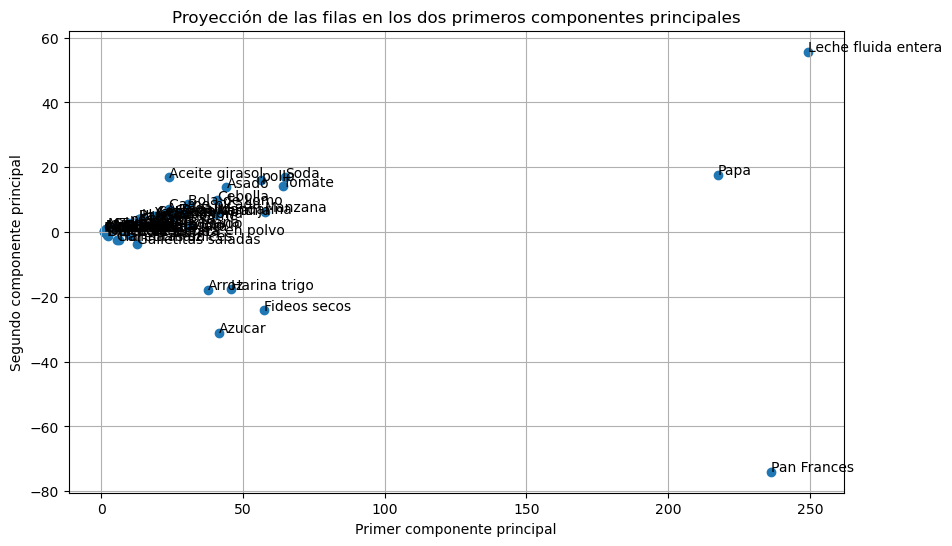

In [9]:
def graficar_componentes_principales(df: pd.DataFrame):
    D, V, datos_centrados, varianza_explicada, nombres = calculoACP_por_fila(df)
    
    # Proyectar los datos centrados en los dos primeros componentes principales
    proyecciones = np.dot(datos_centrados, V[:, :2])
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(proyecciones[:, 0], proyecciones[:, 1])
    
    for i, nombre in enumerate(nombres):
        plt.annotate(nombre, (proyecciones[i, 0], proyecciones[i, 1]))
    
    plt.title('Proyección de las filas en los dos primeros componentes principales')
    plt.xlabel('Primer componente principal')
    plt.ylabel('Segundo componente principal')
    plt.grid()
    plt.show()

graficar_componentes_principales(tabla_nutricional)

Observamos que hay una gran aglomeración de alimentos del lado izquierdo, y 3 outliers sueltos. Analizamos k-means con 2/3 clusters:

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


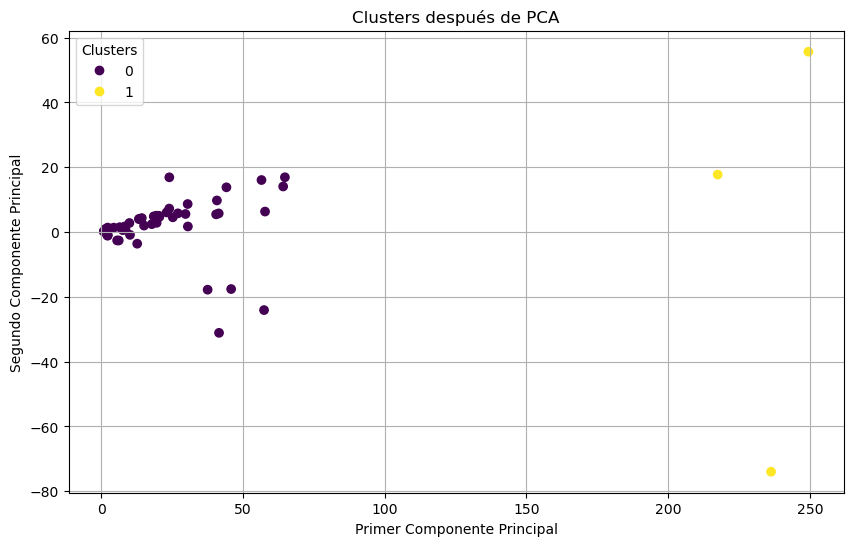

In [14]:
D, V, datos_centrados, varianza_explicada, nombres = calculoACP_por_fila(tabla_nutricional)
proyecciones = np.dot(datos_centrados, V[:, :2])
pca_df= pd.DataFrame (proyecciones, columns=['PCA1', 'PCA2'])

# Definir el número de clústeres
n_clusters = 2

# Inicializar y aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(pca_df)

# Añadir los resultados de K-Means al DataFrame
pca_df['Cluster'] = kmeans.labels_
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')

# Añadir leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Clusters después de PCA')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.grid(True)
plt.show()

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


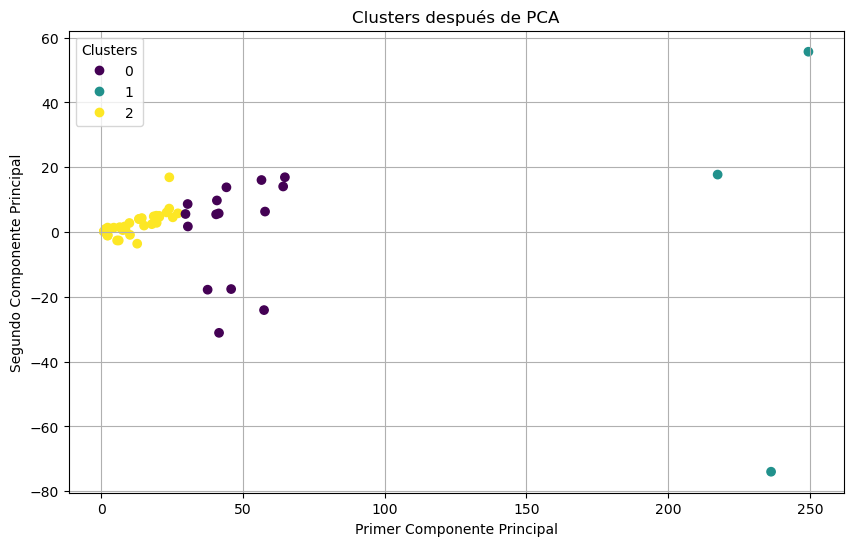

In [11]:
D, V, datos_centrados, varianza_explicada, nombres = calculoACP_por_fila(tabla_nutricional)
proyecciones = np.dot(datos_centrados, V[:, :2])
pca_df= pd.DataFrame (proyecciones, columns=['PCA1', 'PCA2'])

# Definir el número de clústeres
n_clusters = 2

# Inicializar y aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(pca_df)

# Añadir los resultados de K-Means al DataFrame
pca_df['Cluster'] = kmeans.labels_
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')

# Añadir leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Clusters después de PCA')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.grid(True)
plt.show()

# Consigna 4
Proyectar los alimentos de la tabla de Consumidores libres en el
espacio de generadores del ACP.

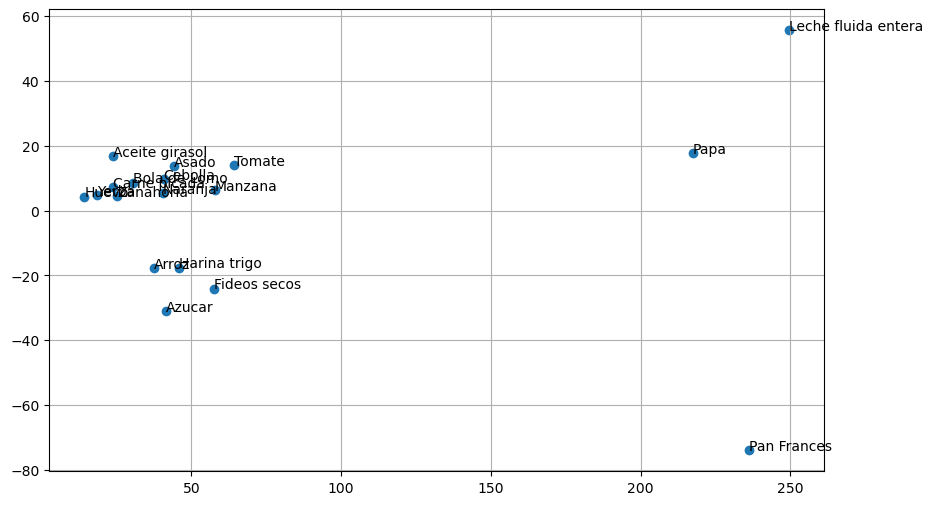

In [13]:
#Filtramos solo los productos que están en ambas tablas:
nombres_productos=['Aceite girasol', 'Arroz', 'Asado', 'Azucar', 'Bola de Lomo', 'Carne picada', 'Cebolla', 'Fideos secos', 'Harina trigo', 'Huevo', 'Leche fluida entera', 'Manzana', 'Naranja', 'Paleta', 'Pan Frances', 'Papa', 'Tomate', 'Yerba', 'Zanahoria']
def graficar_componentes_principales_filtrado(df: pd.DataFrame, lista: list):
    D, V, datos_centrados, varianza_explicada, nombres = calculoACP_por_fila(df)
    
    # Proyectar los datos centrados en los dos primeros componentes principales
    proyecciones = np.dot(datos_centrados, V[:, :2])
    
    # Filtrar las proyecciones para incluir solo los nombres en la lista
    mask = np.isin(nombres, lista)
    proyecciones_filtradas = proyecciones[mask]
    nombres_filtrados = nombres[mask]
    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(proyecciones_filtradas[:, 0], proyecciones_filtradas[:, 1])
    plt.grid()
    
    for i, nombre in enumerate(nombres_filtrados):
        plt.annotate(nombre, (proyecciones_filtradas[i, 0], proyecciones_filtradas[i, 1]))

graficar_componentes_principales_filtrado(tabla_nutricional, nombres_productos)

# Consigna 5

Aplicar Mínimos Cuadrados sobre los precios de cada nutriente (HC, Proteínas y grasas) para evaluar el aumento en estos 4 meses. Graficar cada punto de cada alimento y la recta obtenida por Mínimos Cuadrados. Hacer una tabla de los aumentos.


In [8]:
#Le cambiamos el nombre a los alimentos de la tabla de consumidores libres para que coincidan con los nombres que tienen en la tabla nutricional, para así poder compararlos.

tabla_consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')
nombres_productos=['Aceite girasol', 'Arroz', 'Asado', 'Azucar', 'Bola de Lomo', 'Carne picada', 'Cebolla', 'Fideos secos', 'Harina trigo', 'Huevo', 'Leche fluida entera', 'Manzana', 'Naranja', 'Paleta', 'Pan Frances', 'Papa', 'Tomate', 'Yerba', 'Zanahoria']

tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'ACEITE COCINERO GIRASOL': 'Aceite girasol'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'ARROZ GRANO FINO': 'Arroz'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'AZUCAR LEDESMA': 'Azucar'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'FIDEOS GUISEROS': 'Fideos secos'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'HUEVOS COLOR DOCENA': 'Huevo'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'HARINA DE TRIGO': 'Harina trigo'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'PAN FRESCO': 'Pan Frances'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'LECHE c/VIT.FORT': 'Leche fluida entera'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'YERBA TARAGUI': 'Yerba'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'ZANAHORIAS': 'Zanahoria'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'TOMATE PERITA': 'Tomate'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'CEBOLLA': 'Cebolla'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'PAPA NEGRA': 'Papa'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'NARANJA': 'Naranja'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'MANZANA': 'Manzana'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'BOLA DE LOMO': 'Bola de Lomo'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'ASADO	': 'Asado'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'PALETA': 'Paleta'})
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace({'CARNE PICADA COMUN': 'Carne picada'})

alimentos_comunes = set(tabla_nutricional['Alimento']).intersection(set(tabla_consumidores_libres['PRODUCTOS']))
print (alimentos_comunes)

{'Tomate', 'Naranja', 'Azucar', 'Arroz', 'Manzana', 'Carne picada', 'Yerba', 'Leche fluida entera', 'Harina trigo', 'Pan Frances', 'Bola de Lomo', 'Fideos secos', 'Cebolla', 'Zanahoria', 'Aceite girasol', 'Papa', 'Huevo'}


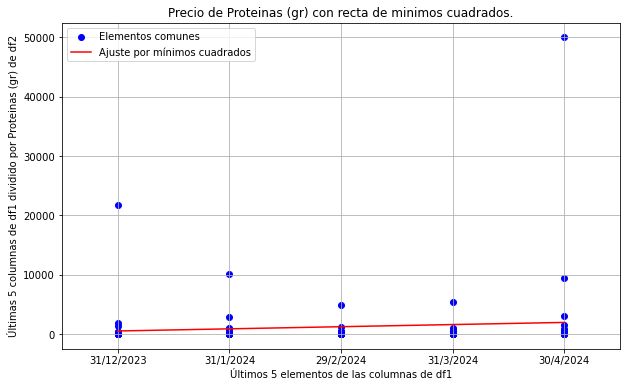

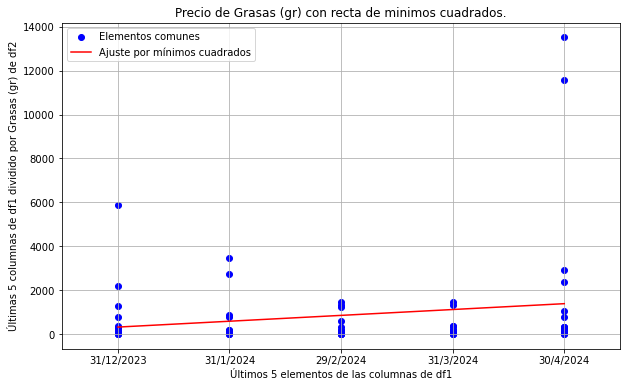

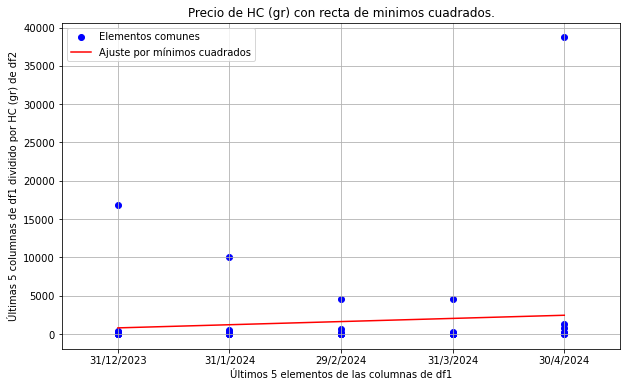

In [9]:
def plot_common_elements_with_fit(df1, df2, column_to_divide):
    
    # Identificar elementos comunes
    common_elements = alimentos_comunes
    
    if len(common_elements) == 0:
        print("No hay elementos comunes entre los DataFrames.")
        return
    
    # Seleccionar los últimos 5 elementos de las columnas del primer DataFrame para el eje X
    x = np.tile(df1.columns[-5:], df1.shape[0])
    
    # Seleccionar los valores correspondientes de las últimas 5 columnas del primer DataFrame para el eje Y
    y = df1.iloc[:, -5:].values.flatten()

    # Dividir los valores de Y por los valores correspondientes de la columna especificada del segundo DataFrame
    divisor = np.tile(df2[column_to_divide].values[:df1.shape[0]], 5)
    divisor = divisor * np.tile(df2['Cantidad (gr/ml)'].values[:df1.shape[0]], 5)

    
    # Identificar los índices donde el divisor es cero
    non_zero_indices = divisor > 0.1
    
    # Filtrar los valores de y y x_numeric donde divisor no es cero
    y = y[non_zero_indices]
    x = x[non_zero_indices]
    divisor = divisor[non_zero_indices]

    
    # Realizar la división solo en los índices no cero
    y = y / divisor

    # Convertir x a valores numéricos para el ajuste
    x_unique = df1.columns[-5:]
    x_numeric = np.array([i for i, col in enumerate(x_unique) for _ in range(df1.shape[0])])
    x_numeric = x_numeric[non_zero_indices]

    # Normalizar x_numeric y y
    x_numeric_normalized = (x_numeric - np.mean(x_numeric)) / np.std(x_numeric)
    y_normalized = (y - np.mean(y)) / np.std(y)

    # Crear el gráfico de dispersión
    plt.figure(figsize=(10, 6))
    plt.scatter(x_numeric, y, color='blue', label='Elementos comunes')
    
    # Calcular la recta por mínimos cuadrados
    A = np.vstack([x_numeric_normalized, np.ones(len(x_numeric_normalized))]).T
    m, c = np.linalg.lstsq(A, y_normalized, rcond=None)[0]
    
    # Desnormalizar los coeficientes
    m = m * np.std(y) / np.std(x_numeric)
    c = c * np.std(y) + np.mean(y) - m * np.mean(x_numeric)

    # Añadir la recta de mínimos cuadrados al gráfico
    plt.plot(x_numeric, m * x_numeric + c, 'r', label='Ajuste por mínimos cuadrados')
    
    # Añadir etiquetas y leyenda
    plt.xlabel('Últimos 5 elementos de las columnas de df1')
    plt.ylabel(f'Últimas 5 columnas de df1 dividido por {column_to_divide} de df2')
    plt.title(f'Precio de {column_to_divide} con recta de minimos cuadrados.')
    plt.xticks(ticks=np.arange(len(x_unique)), labels=x_unique)
    plt.legend()
    plt.grid(True)
    
    # Ajustar los límites del eje X
    plt.xlim(-0.5, len(x_unique) - 0.5)  # Aumentar un poco el límite derecho

    plt.show()


plot_common_elements_with_fit(tabla_consumidores_libres, tabla_nutricional, 'Proteinas (gr)')

plot_common_elements_with_fit(tabla_consumidores_libres, tabla_nutricional, 'Grasas (gr)')

plot_common_elements_with_fit(tabla_consumidores_libres, tabla_nutricional, 'HC (gr)')


# Consigna 6

 Comparar el aumento de la carne en comparaci´on con los otros
rubros. Si la gente consume ese porcentaje menos de carne, como queda la ingesta
individual con respecto a la tabla de metas de la OMS?


In [25]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')
820
tabla_nutricional.fillna(0, inplace=True)

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

tabla_consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')
tabla_consumidores_libres['PRODUCTOS'] = tabla_consumidores_libres['PRODUCTOS'].str.lower()
rubros = {
    'Carnes': ['asado', 'bola de lomo', 'carne picada comun', 'paleta'],    
    'Otros': ['arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco', 'aceite cocinero girasol', 'azucar ledesma', 'huevos color docena', 'yerba taragui', 'leche c/vit.fort', 'acelga paquete', 'berenjenas', 'cebolla', 'manzana', 'naranja', 'papa negra', 'tomate perita', 'zanahorias']
}

# Inicializa un diccionario para guardar la inflación por rubro
inflacion_por_rubro = {}

# Función para calcular la inflación
def calcular_inflacion(precios):
    return ((precios.iloc[-1] - precios.iloc[0]) / precios.iloc[0]) * 100

# Itera sobre los rubros y calcula la inflación
for rubro, productos in rubros.items():
    inflacion_total = 0
    productos_contados = 0
    for producto in productos:
        if producto in tabla_consumidores_libres['PRODUCTOS'].values:
            precios_producto = tabla_consumidores_libres[tabla_consumidores_libres['PRODUCTOS'] == producto].iloc[0, 2:]
            inflacion_total += calcular_inflacion(precios_producto)
            productos_contados += 1
    if productos_contados > 0: 
        inflacion_promedio = inflacion_total / productos_contados
        inflacion_por_rubro[rubro] = inflacion_promedio

# Comparo la inflación de la carne con la de los demás alimentos:
print("Inflación por rubro: ", inflacion_por_rubro)


def multiplicar_fila(df, valores_fila, valor_multiplicador):

    # Localizar la fila basada en el valor en la columna 'Alimento' y multiplicar
    for valor in valores_fila:
        df.loc[df['Alimento'] == valor, df.columns != 'Alimento'] *= valor_multiplicador
    return df
carnes = ["Asado", "Paleta", "Bola de Lomo", "Carne picada"]
inflacion_carne = inflacion_por_rubro["Carnes"]
tabla_modificada = multiplicar_fila(tabla_nutricional, carnes, (100-inflacion_carne)/100)
eval_oms(tabla_modificada)

Inflación por rubro:  {'Carnes': 41.47752635655861, 'Otros': 96.13594387514316}
Hidratos de carbono: 61.40364091856322  Proteinas: 15.465642914403052  Grasas: 10.848927052819915  Azucares Libres: 8.494293812396462  ags: 3.515359495853787  Fibra: 21.26  Sodio: 1307.7506349600221  Frutas y Verduras: 634.0
Hidratos de carbono: True  Proteinas: False  Grasas: False  Azucares Libres: True  ags: True  Fibra: False  Sodio: True  Frutas y Verduras: True


False

# Consigna 7

Proponer dos alimentos de la tabla 3 que puedan reemplazar la disminución del 18.5% en el consumo de carne sin perder valor nutricional. Corroborar con la tabla de metas de la OMS la dieta diaria obtenida. Además, se impone como restricción en la elección que el precio de los alimentos de reemplazo debe ser menor al 50% del aumento del precio de la carne.

In [28]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

tabla_nutricional.fillna(0, inplace=True)

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

def buscar_valores(tabla_nutricional):
    cantidad= tabla_nutricional['Cantidad (gr/ml)'].sum()
    hidratosDeCarbono=tabla_nutricional['HC (gr)'].sum()
    proteinas=tabla_nutricional['Proteinas (gr)'].sum()
    grasas=tabla_nutricional['Grasas (gr)'].sum()
    azucaresL=tabla_nutricional['Azucares Libres (gr)'].sum()
    ags=tabla_nutricional['AGS (gr)'].sum()
    agni=tabla_nutricional['AGNI (gr)'].sum()
    agP=tabla_nutricional['AG p (gr)'].sum()
    fibra=tabla_nutricional['Fibra (gr)'].sum()
    sodio=tabla_nutricional['Na (gr)'].sum()
    calcio=tabla_nutricional['Ca (gr)'].sum()
    hierro=tabla_nutricional['Fe (gr)'].sum()

    return (hidratosDeCarbono, proteinas,  grasas , azucaresL, ags, fibra, sodio)
#Como la tabla nutricional nunca cumplio con las metas de la OMS, planteamos ver como esta la tabla antes y despues de la reduccion del 18,5%.


#Buscamos los nutrientes que se perdieron al reducir el consumo de carnes en un 18,5%
valores_tabla_original=buscar_valores(tabla_nutricional)
tabla_modificada=multiplicar_fila(tabla_nutricional, carnes, (100-18.5)/100)
valores_tabla_modificada=buscar_valores(tabla_modificada)
valores_a_reponer=[a-b for a,b in zip (valores_tabla_original,valores_tabla_modificada)]

print (valores_a_reponer)



[0.0, 4.053349999999995, 1.9758000000000067, 0.0, 1.2025000000000006, 0.0, 0.013364399999999943]


In [32]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

tabla_nutricional.fillna(0, inplace=True)

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

#Proponemos un aumento del 30% al consumo de la leche y de la papa ya que son 2 alimentos relativamente baratos y nutritivos.
#Esto serian 270*0.3 mililitros de leche y 229*0.3 gramos de papa.
tabla_modificada=multiplicar_fila(tabla_nutricional, carnes, (100-18.5)/100)
tabla_modificada=multiplicar_fila(tabla_modificada,['Papa','Leche fluida entera'],1.3)
valores_tabla_modificada=buscar_valores(tabla_modificada)
valores_a_reponer=[a-b for a,b in zip (valores_tabla_original,valores_tabla_modificada)]
print (valores_a_reponer)
#Como los valores nos dan todos negativos significa que logramos suplir todo el deficit de nutrientes.
gasto_extra_papa=229*0.3*0.9
gasto_extra_leche=270*0.3*1.99
gasto_extra=gasto_extra_papa+gasto_extra_leche
print("Gasto extra al aumentar la papa y la leche: " ,gasto_extra)

gasto_reducido_carnes=(100-18.5)/100*(5500*0.027+7900*0.015+7750*0.05+8650*0.034)
print("Gasto ahorrado al disminuir el consumo de carne: ",gasto_reducido_carnes)
print("___________________________________________________________________________________________________________________________________________________________________________________")
eval_oms(tabla_modificada)

[-15.884999999999991, -0.3116500000000144, -0.3731999999999971, 0.0, -0.2944999999999993, -1.097999999999999, -0.04929359999999994]
Gasto extra al aumentar la papa y la leche:  223.02
Gasto ahorrado al disminuir el consumo de carne:  773.1089999999999
___________________________________________________________________________________________________________________________________________________________________________________
Hidratos de carbono: 60.92072155956295  Proteinas: 16.115805443417784  Grasas: 11.049021940189558  Azucares Libres: 8.113327110919922  ags: 3.785242383299935  Fibra: 22.358  Sodio: 1387.0076  Frutas y Verduras: 702.7
Hidratos de carbono: True  Proteinas: False  Grasas: False  Azucares Libres: True  ags: True  Fibra: False  Sodio: True  Frutas y Verduras: True


False

# Consigna 8

Proponer dos alimentos de la tabla 1 que estén lejanos en el sentido de distancia euclidiana en el espacio de generadores del ACP, que puedan reemplazar la cantidad de proteína perdida. Se pueden considerar todos los alimentos de la tabla 1. Luego, corroborar cómo varían los objetivos ahora en la tabla de metas de la OMS en cada caso.

In [84]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

tabla_nutricional.fillna(0, inplace=True)

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

#Buscamos el deficit de proteinas que tenemos. En este caso, como no nos influye el precio, tomamos todos los elementos que consideramos carnes.
carnes=["Asado", "Paleta", "Bola de Lomo", "Paleta cocida", "Mortadela", "Higado", "pollo", "pescado", "Carne picada", "Hueso c/carne"]
tabla_modificada=multiplicar_fila(tabla_nutricional, carnes, (100-18.5)/100)

#Proponemos huevos y leche ya que al ser esta ultima un outlier, esta lejos de la gran mayoria de alimentos. A su vez, son los alimentos con menos y mas valor en el eje x y son altos en proteínas.
tabla_modificada=multiplicar_fila(tabla_modificada,['Leche fluida entera'],1.5)
tabla_modificada=multiplicar_fila(tabla_modificada,['Huevo'],3)
valores_tabla_modificada=buscar_valores(tabla_modificada)
valores_a_reponer=[a-b for a,b in zip (valores_tabla_original,valores_tabla_modificada)][1]

print (valores_a_reponer)
print("___________________________________________________________________________________________________________________________________________________________________________________")
eval_oms(tabla_modificada)

-0.16250000000002274
___________________________________________________________________________________________________________________________________________________________________________________
Hidratos de carbono: 60.08575444312261  Proteinas: 16.247373833315816  Grasas: 11.784298154746619  Azucares Libres: 8.190400798048177  ags: 4.024871195343227  Fibra: 21.26  Sodio: 1425.3798499999998  Frutas y Verduras: 634.0
Hidratos de carbono: True  Proteinas: False  Grasas: False  Azucares Libres: True  ags: True  Fibra: False  Sodio: True  Frutas y Verduras: True


False